In [6]:
import numpy as np
import pandas
from Bio.PDB import *
import Bio.PDB
%matplotlib inline
from ipymol import viewer as pymol
pymol.start()   # Start PyMOL RPC server

ConnectionRefusedError: [Errno 61] Connection refused

# Alternate SALSA
Given an arbitrary protein (probably from SG) query it in the database and get the top hits back, to try and better assign putative function.
********

## 1. Active Site Database
This database will hold information that allows for better queries of protein function similarity. Rather than using 3D similarity, which could

An example where this is the case is in Beta Clamps, as Scott found in his project. 


This database will be generated with the following steps for many structures in the PDB Database
1. Download structural information from http://pdb.org
2. Run POOL on http://pool.neu.edu to determine active site residues
3. Download POOL results and parse file
4. Open PyMol
5. Use PyMol Python API to remove all but top 25 residues

## 2. Similarity Measurement
Given two entries in the Active Site Database, compute the similarity by a 3D alignment, such as MUSTANG. For the purpose of the experiment, let's compare the results of active site alignment versus total 3D alignment, side by side.


### Active Site Alignment
It migh also be interesting to do a sequence alignment on the active site. This information sort of exists in places like PFAM that hold information about the consensus sequence of protein families. 

Do a sequence alignment on the two proteins to make an order. Only keep stuff that reasonably matches up? Maybe this isn't the best idea. I think the general problem of superimposing these things in a biologically relevant way might be really not possible..


## 3. Test Data Set
Check Ondrechen's group's pubications on SALSA to see some examples of incorrect putative annotations, and then the proper annotations. Can this method make the same assertions? Given a family of proteins with lab-tested function, can we take one out and get the correct assignment back?

### To Consider
* How to deal with multimers (homodimers, heterodimers, homotrimers, etc...)
* Keep it all scripted
* Jupyter and PyMol http://github.com/cxhernandez/ipymol

## Code

### Command Line Arguments


In [9]:
def show_pdb(pdb, shower=pymol, pdbio=None, floc=None):
    pdbio = pdbio if pdbio else PDBIO() 
    floc = floc if floc else tmp() 
    pdbio.set_structure(pdb)
    pdbio.save(floc)
    pymol.do("load }".format(floc))
    pymol.show()
    
working_directory = "/Users/cthoyt/dev/SALSA"

s1_code = "4NZJ"
s1_file = "/Users/cthoyt/dev/notebooks/SALSA/4NZJ.pdb"
s1_pool = "/Users/cthoyt/dev/notebooks/SALSA/4NZJ.pool.csv"

#url =  "http://129.10.88.55:8080/wPOOL/Results/1OPY.jsp"
#url2 = "http://129.10.88.55:8080/wPOOL/Results/1838043.poolranks"        

### Load Parsed POOL Data

In [10]:
d = pandas.DataFrame.from_csv(path=s1_pool)
d["Residue_Number"][:5]

Rank
1    241
2    277
3    297
4    342
5    340
Name: Residue_Number, dtype: int64

### Load and Manipulate Structure

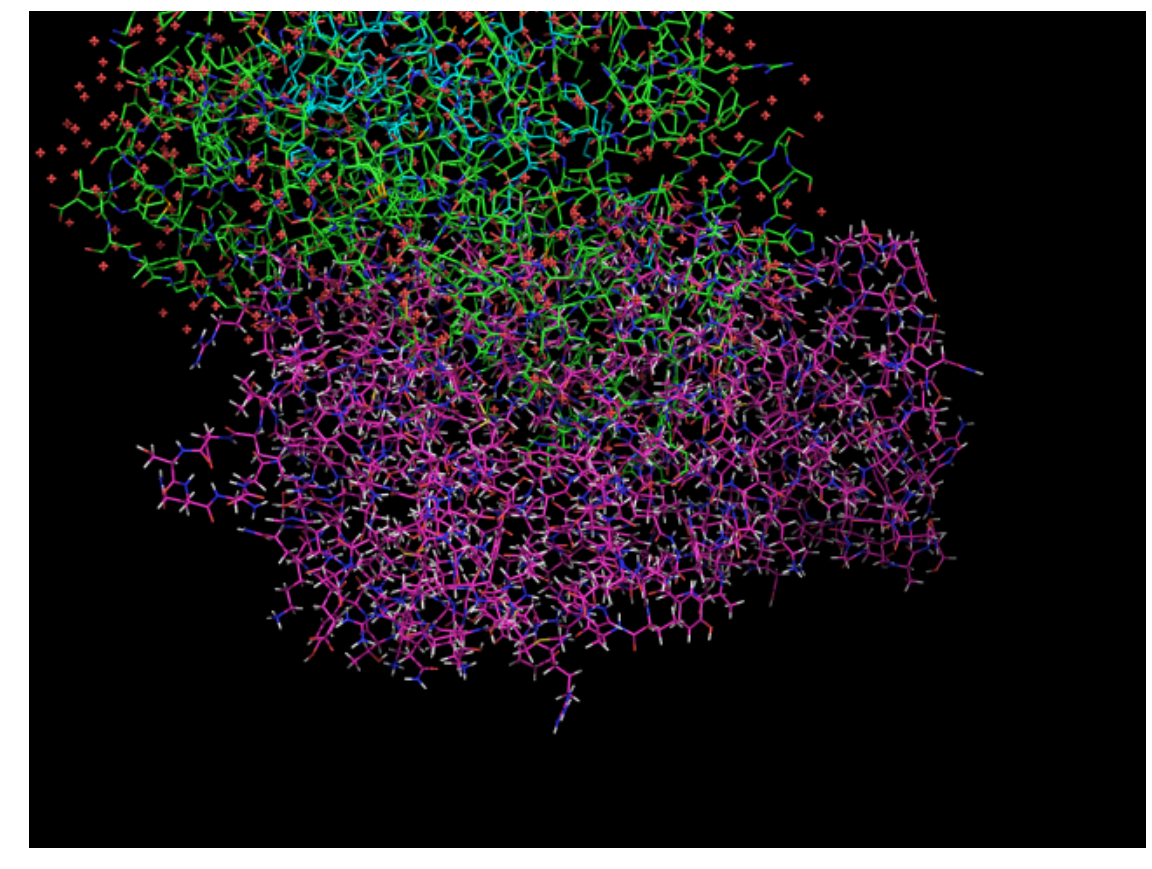

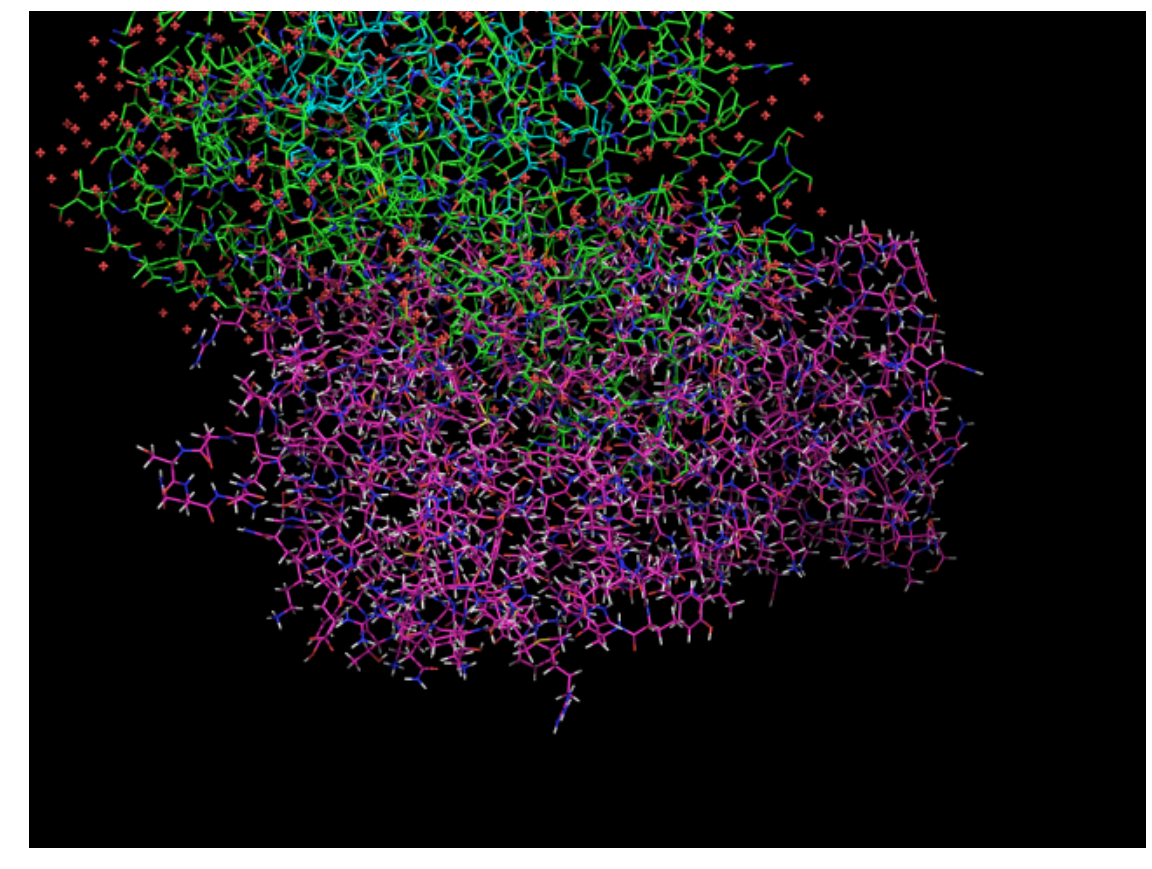

In [11]:
p = PDBParser()
s1 = p.get_structure(s1_code, s1_file)
s1 = s1[0] # should only be length 1

pymol.do('load {}'.format(s1_file))
pymol.show()

TypeError: Image data can not convert to float

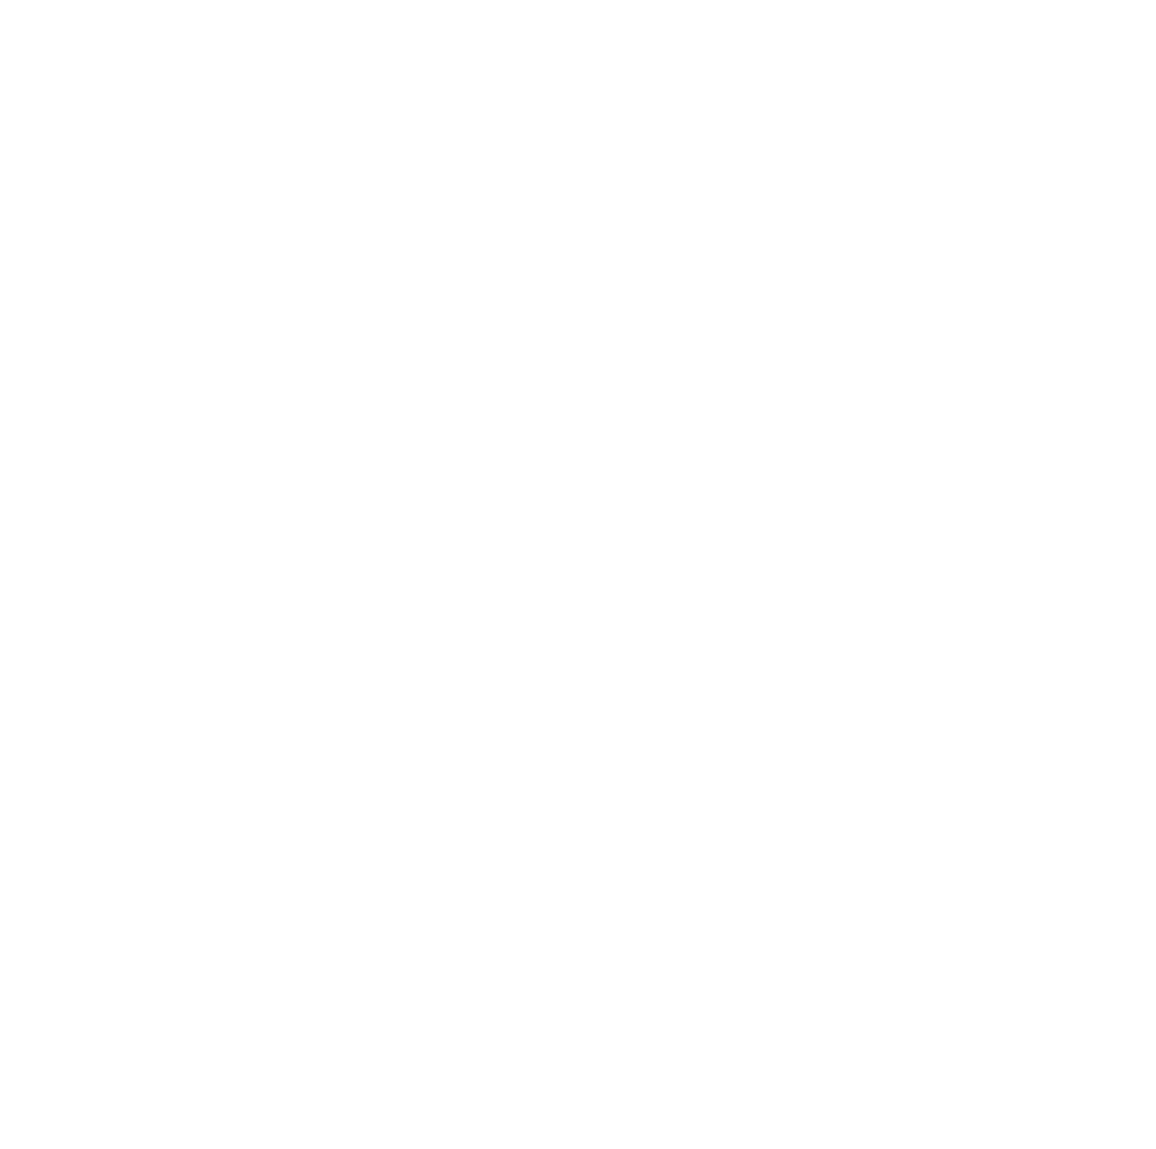

In [13]:
top_residues = 50 # how many residues should we keep

se = set(d["Residue_Number"][:top_residues])

for chain in s1:
    for residue in list(chain.get_residues()):
        rid = residue.get_id()
        if rid[1] not in se:
            chain.detach_child(rid)

io = PDBIO()
io.set_structure(s1)
io.save("/Users/cthoyt/dev/notebooks/4NZJ_cut.pdb")
pymol.do('load /Users/cthoyt/dev/notebooks/4NZJ_cut.pdb')
pymol.show()

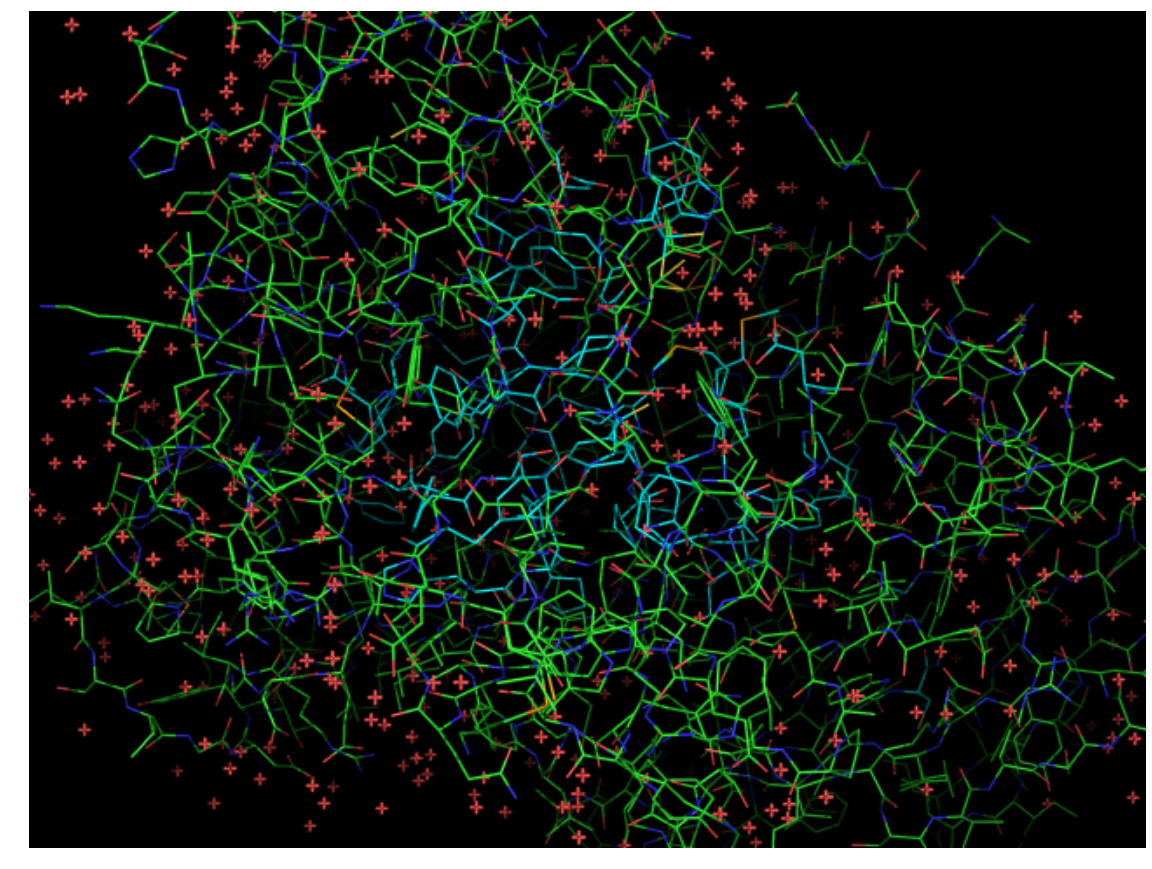

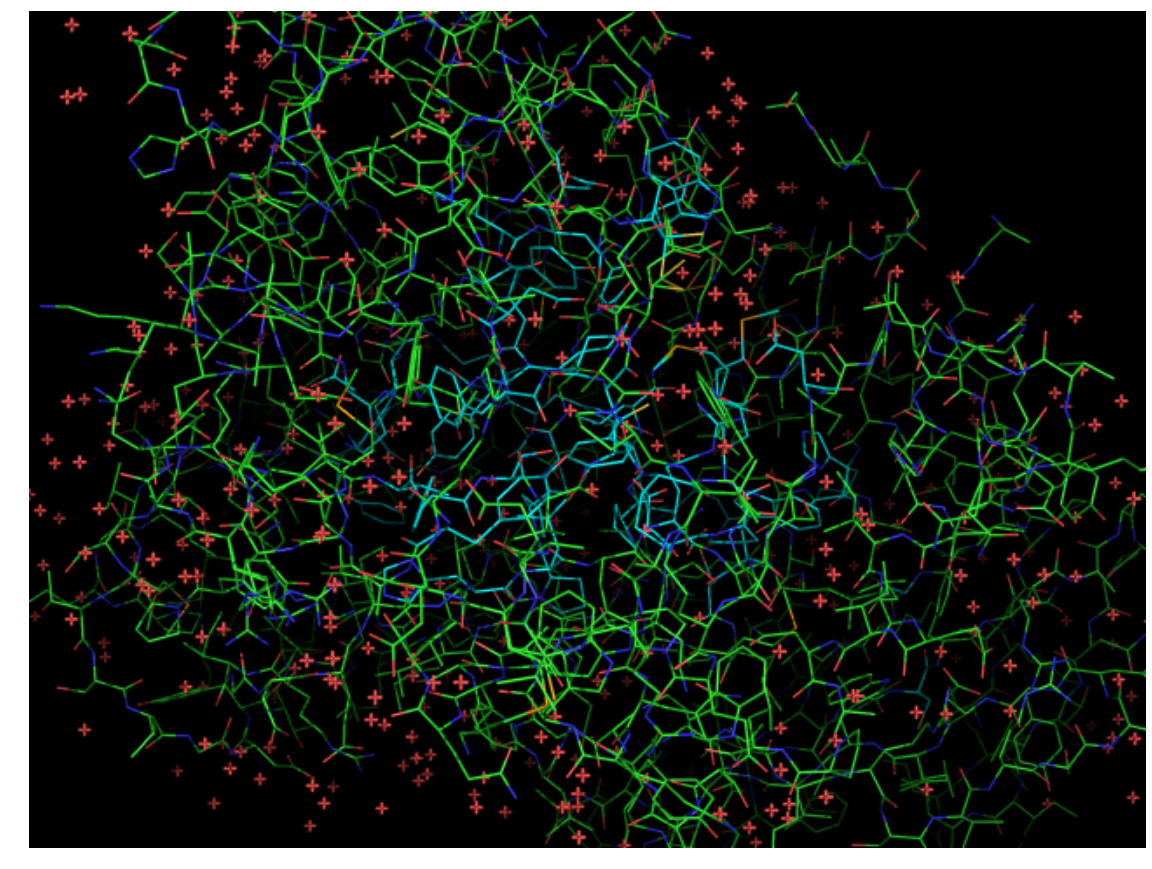

# Comparisons
Now we will do the same procedure on a protein of known function, 1UAS and compare the active site of 4NZJ.

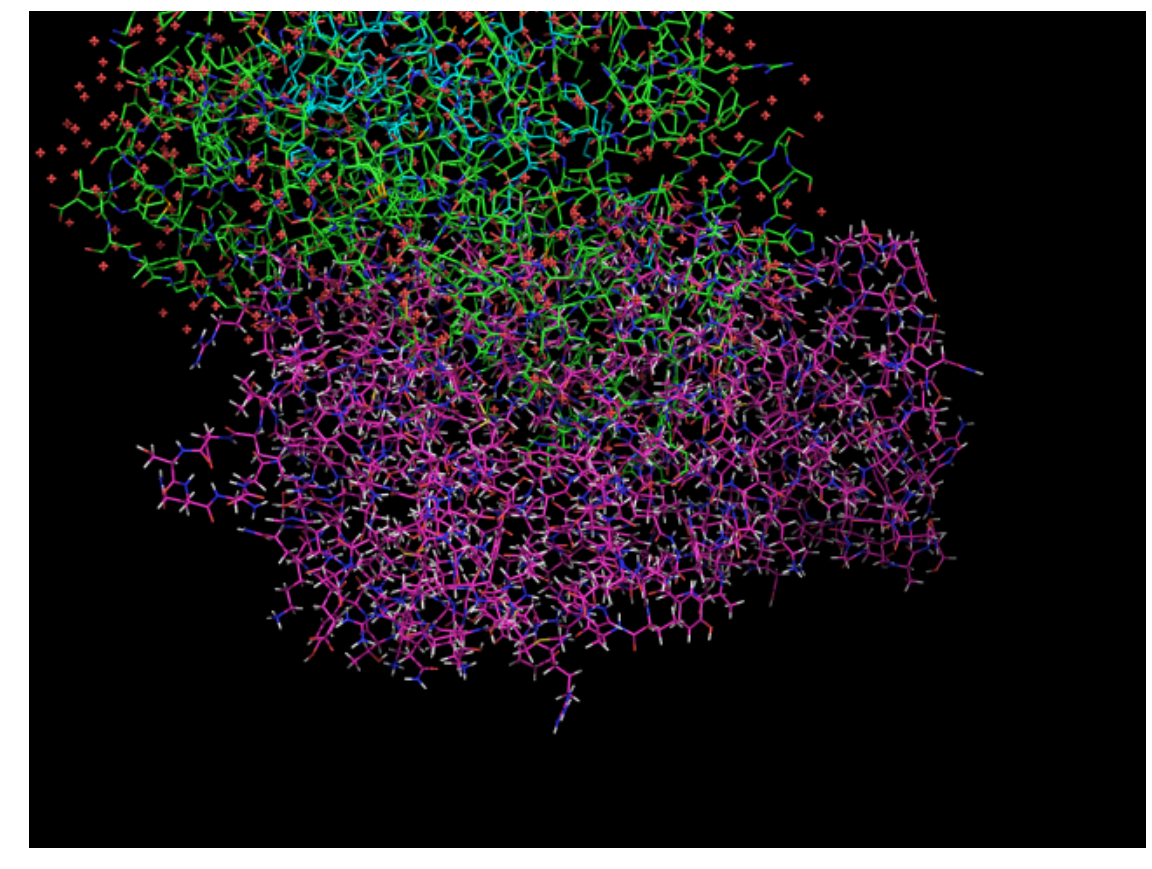

In [19]:
s2_code = "1UAS"
s2_file = "/Users/cthoyt/dev/notebooks/SALSA/1UAS_cut.pdb"
pymol.do("load {}".format(s2_file))
pymol.show()

s2 = p.get_structure(s2_code, s2_file)[0]


In [20]:
s1_atoms = []
for c in s1:
    for r in c:
        if 'CA' in r:
            s1_atoms.append(r['CA'])
        else: 
            print(r)
        
print(len(s1_atoms), s1_atoms[:10])
        
s2_atoms = []
for c in s2:
    for r in c:
        if 'CA' in r:
            s2_atoms.append(r['CA'])  
        else:
            print(r)

50 [<Atom CA>, <Atom CA>, <Atom CA>, <Atom CA>, <Atom CA>, <Atom CA>, <Atom CA>, <Atom CA>, <Atom CA>, <Atom CA>]


In [24]:
super_imposer = Superimposer()
super_imposer.set_atoms(s1_atoms, s2_atoms)
super_imposer.apply(s1.get_atoms())

# Print RMSD:
print(super_imposer.rms)

# Save the aligned version of 1UBQ.pdb
io = Bio.PDB.PDBIO()
io.set_structure(s1) 
s3_file  = "/Users/cthoyt/dev/notebooks/SALSA/align.pdb"
io.save(s3_file)
pymol.do("load {}".format(s3_file))
pymol.show()

PDBException: Fixed and moving atom lists differ in size

In [4]:
pymol.do('load {}'.format("/Users/cthoyt/Downloads/SAK_energymin.pdb"))
pymol.show()

NameError: name 'pymol' is not defined